Importing librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import FacetGrid
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

Downloading StopWords to execlude them from reviews later

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Importing Dataset

In [3]:
df = pd.read_csv("yelp.csv")
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
df['length'] = df['text'].apply(len)
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<AxesSubplot: ylabel='Frequency'>

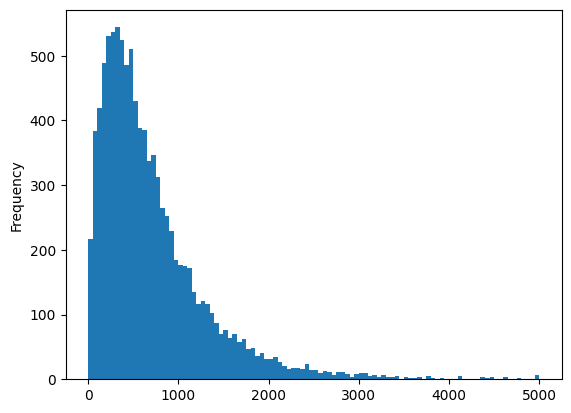

In [6]:
df['length'].plot(kind='hist',bins=100)

In [7]:
round(df['length'].mean(),2)

710.74

In [8]:
round(df[df['stars'] <= 3]['length'].mean(),2)

799.49

In [9]:
round(df[df['stars'] > 3]['length'].mean(),2)

670.17

In [10]:
df.describe()

,stars,cool,useful,funny,length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300,710.738700
std,1.214636,2.067861,2.336647,1.907942,617.399827
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,0.000000,0.000000,0.000000,294.000000
50%,4.000000,0.000000,1.000000,0.000000,541.500000
75%,5.000000,1.000000,2.000000,1.000000,930.000000
max,5.000000,77.000000,76.000000,57.000000,4997.000000


In [11]:
df[df['length'] == df['length'].max()]['text']

55    In our continuing quest to identify cool, loca...
Name: text, dtype: object

In [12]:
df.sort_values('length',ascending=False).iloc[0]['text']

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [13]:
df.sort_values('length',ascending=False).iloc[-1]['text']

'X'

<AxesSubplot: xlabel='count', ylabel='stars'>

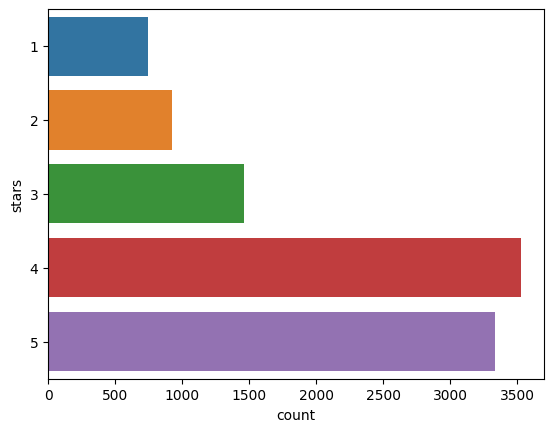

In [14]:
sns.countplot(y='stars',data=df)

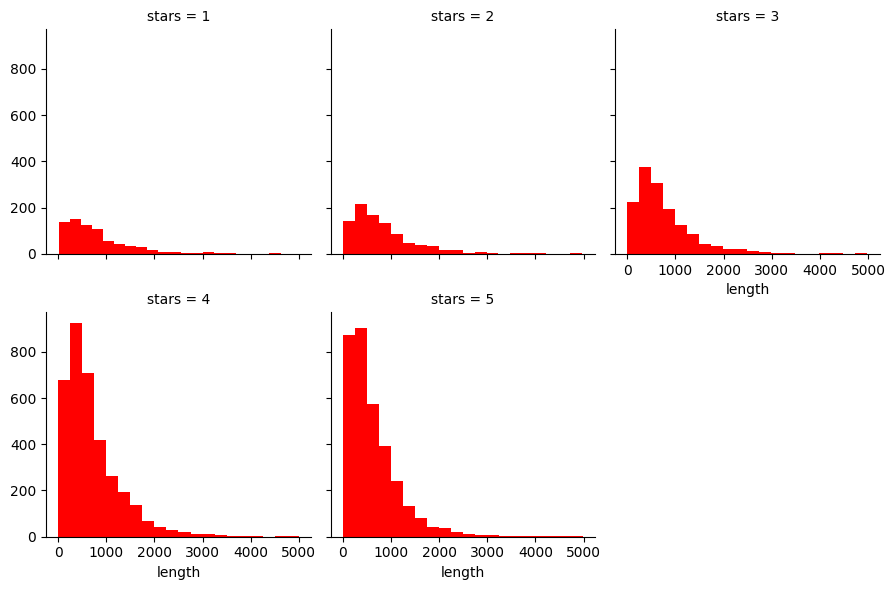

In [15]:
g = FacetGrid(data=df,col='stars',col_wrap=3)
g.map(plt.hist,'length',bins=20,color='r')

In [16]:
stopwords = stopwords.words('english')

Cleaning reviews text

In [17]:
def remove_punctuation(string):
    punctuation_pattern = re.compile(r'[^\w\s]')
    result_string = punctuation_pattern.sub('', string)
    words_list = result_string
    return words_list

stop_words_set = set(stopwords)
def remove_stop_words(input_string):
    words = word_tokenize(input_string)
    stopword_pattern = re.compile(r'\b(?:{})\b'.format('|'.join(map(re.escape, stop_words_set))), flags=re.IGNORECASE)
    result_string = stopword_pattern.sub('', input_string)
    return result_string


In [18]:
df['text'] = df['text'].apply(remove_punctuation)
df['text']

0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
2       love the gyro plate Rice is so good and I also...
3       Rosie Dakota and I LOVE Chaparral Dog Park Its...
4       General Manager Scott Petello is a good egg No...
                              ...                        
9995    First visitHad lunch here today  used my Group...
9996    Should be called house of deliciousness\n\nI c...
9997    I recently visited Olive and Ivy for business ...
9998    My nephew just moved to Scottsdale recently so...
9999    45 locations all 45 star average I think Arizo...
Name: text, Length: 10000, dtype: object

In [19]:
df['text'] = df['text'].apply(remove_stop_words)
df['text']

0        wife took     birthday  breakfast    excellen...
1          idea   people give bad reviews   place  goe...
2       love  gyro plate Rice   good   also dig  candy...
3       Rosie Dakota   LOVE Chaparral Dog Park   conve...
4       General Manager Scott Petello   good egg   go ...
                              ...                        
9995    First visitHad lunch  today  used  Groupon  \n...
9996      called house  deliciousness\n\n could go    ...
9997     recently visited Olive  Ivy  business last we...
9998     nephew  moved  Scottsdale recently     bunch ...
9999    45 locations  45 star average  think Arizona r...
Name: text, Length: 10000, dtype: object

In [20]:
df['text'] = df['text'].str.strip()
df['text'] = df['text'].apply(lambda sentence: sentence.split())

Vectorizing texts

In [21]:
vectorizer = CountVectorizer()
df_1_5 = df[(df['stars'] == 1) | (df['stars'] == 5)]
df_vectorizer1_5 = vectorizer.fit_transform(df_1_5['text'].apply(lambda x: ' '.join(x)))

In [22]:
df['text']

0       [wife, took, birthday, breakfast, excellent, w...
1       [idea, people, give, bad, reviews, place, goes...
2       [love, gyro, plate, Rice, good, also, dig, can...
3       [Rosie, Dakota, LOVE, Chaparral, Dog, Park, co...
4       [General, Manager, Scott, Petello, good, egg, ...
                              ...                        
9995    [First, visitHad, lunch, today, used, Groupon,...
9996    [called, house, deliciousness, could, go, item...
9997    [recently, visited, Olive, Ivy, business, last...
9998    [nephew, moved, Scottsdale, recently, bunch, f...
9999    [45, locations, 45, star, average, think, Ariz...
Name: text, Length: 10000, dtype: object

In [23]:
print(vectorizer.get_feature_names())

['00s', '01042012', '022010', '03342', '05', '050', '06', '07092008', '075', '09', '090', '095', '10', '100', '1000', '10000', '1000am', '1000pm', '1000x', '1001', '100150', '1007', '100s', '100th', '101', '1011', '1012', '101412', '1015', '102', '1025', '1030', '103011', '1030pm', '10312012', '105', '1070', '108', '109', '1095', '1099', '10am', '10am4pm', '10close', '10each', '10gallon', '10ish', '10min', '10mins', '10minutes', '10person', '10pm', '10pm12am', '10shrimp', '10th', '10thand', '10x', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '111', '1113', '1115', '1118', '111807', '111809', '111909', '111pm', '111th', '112', '112312', '1125', '1130', '1130am', '1135', '1139', '114', '1141', '1145', '115', '1150', '1152', '1154', '1155', '115th', '116', '118', '1182010', '1199', '11991079', '11a3p', '11am', '11ish', '11person', '11pm', '12', '120', '1200', '12000', '1205', '1207', '120year', '121007', '121107', '121207', '1213', '121407', '1216', '122111', '122112', '1230',

c:\Users\Amr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
df_vectorizer1_5.shape

(4086, 21887)

Training the model

In [25]:
NB_Classifier = MultinomialNB()
label = df_1_5['stars'].values

In [26]:
NB_Classifier.fit(df_vectorizer1_5,label)

MultinomialNB()

In [27]:
samp = ['amazing food! recommended']
samp2= ['shit food made me sick']

In [28]:
testingsample = vectorizer.transform(samp)
testingsample2 = vectorizer.transform(samp2)
pred1 = NB_Classifier.predict(testingsample)
pred2 = NB_Classifier.predict(testingsample2)

In [29]:
print(pred1)
print(pred2)

[5]
[1]


In [30]:
X = df_vectorizer1_5
y = label

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2)

In [32]:
NB_Classifier = MultinomialNB()
NB_Classifier.fit(xtrain,ytrain)

MultinomialNB()

In [33]:
train_pred = NB_Classifier.predict(xtrain)
test_pred = NB_Classifier.predict(xtest)

Model Evaluation

In [34]:
cm = confusion_matrix(ytrain,train_pred)
cm2 = confusion_matrix(ytest,test_pred)

In [35]:
cm

array([[ 525,   69],
       [   9, 2665]], dtype=int64)

In [36]:
cm2

array([[117,  38],
       [ 18, 645]], dtype=int64)

<AxesSubplot: >

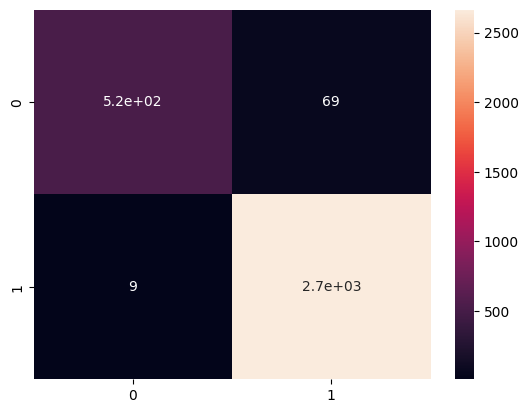

In [37]:
sns.heatmap(cm,annot=True)

<AxesSubplot: >

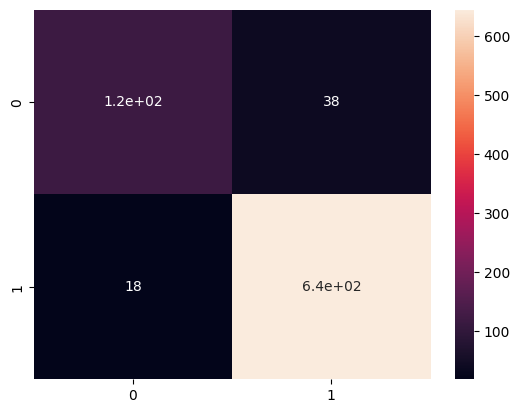

In [38]:
sns.heatmap(cm2,annot=True)

In [39]:
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           1       0.87      0.75      0.81       155
           5       0.94      0.97      0.96       663

    accuracy                           0.93       818
   macro avg       0.91      0.86      0.88       818
weighted avg       0.93      0.93      0.93       818

